In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
df= pd.read_csv('/Users/bimal/Downloads/carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [ ]:
#cleaning data

In [5]:
df.nunique()

Car Model         3
Mileage          12
Sell Price($)    13
Age(yrs)          7
dtype: int64

In [6]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [ ]:
#data visualization

In [7]:
import seaborn as sns

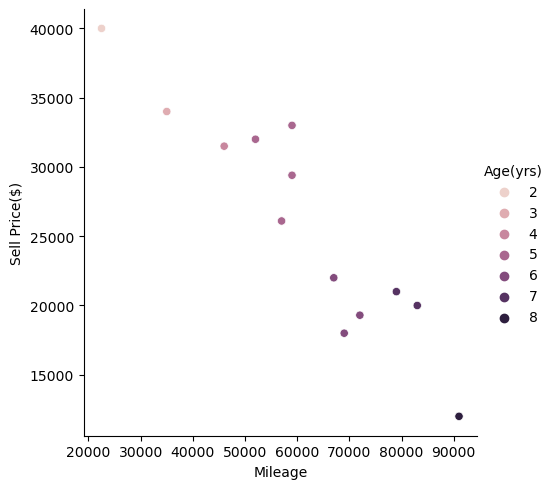

In [12]:
sns.relplot(x='Mileage',y='Sell Price($)',hue='Age(yrs)', data= df)

In [15]:
d=pd.get_dummies(df['Car Model'])
d

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [27]:
df1=pd.concat([df,d],axis='columns')
df1

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [28]:
df2=df1.drop(['Car Model','Mercedez Benz C class'],axis='columns')
df2

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [30]:
X=df2.drop(['Sell Price($)'],axis='columns')
X.head()

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1


In [37]:
reg=linear_model.LinearRegression()
reg.fit(X,df2['Sell Price($)'])

LinearRegression()

In [38]:
reg.predict(np.array([45000, 4, 0, 0]).reshape(1, -1))

/Users/bimal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [40]:
reg.predict(np.array([86000,7,0,1]).reshape(1,-1))

/Users/bimal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [39]:
reg.score(X,df2['Sell Price($)'])

0.9417050937281082